In [2]:
from pathlib import Path
import itertools

import numpy as np

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.path as mpath
import matplotlib.pyplot as plt

from matplotlib import rcParams


import themepy

theme = themepy.Theme('paper')
paper_path = Path('../../../paper/figures/')
slide_path = Path('../../../slides/figures/math/')
proposal_path = Path('../../../draft/figures/math/')
#rcParams['path.sketch'] = (.5, 25, 20)

%matplotlib inline

In [3]:
rcParams['font.family'] = 'Segoe Print'

In [4]:
fc = rcParams['axes.facecolor']
textsize = 12
labelsize=14

In [5]:
def k_discrete(ax, labelsize, kx =.45, ky=.25):
    ax.scatter([.2, .8], [ky, ky], s=100, color='C0')
    ax.annotate('K', (kx, ky-.03), fontsize=labelsize)


In [6]:
def two_fiber_discrete(ax, textsize, labelsize):
    s = .4
    x = .2 - s/2
    y = .425
    off = .6
    f1 = mpatches.Rectangle((x, y), s, s, facecolor=fc, edgecolor='C0', linewidth=2)
    ax.add_patch(f1)
    f2 = mpatches.Rectangle((x+off, y), s, s, facecolor=fc, edgecolor='C0', linewidth=2)
    ax.add_patch(f2)
    thx = .175
    thy = .85
    tvx = -.085
    tvy = .63
    for o in [0, off]:
        pass
        #ax.annotate(r"$\mathbb{R}$", (thx + o, thy), fontsize=textsize)
        #ax.annotate(r"$\mathbb{R}$", (tvx + o, tvy), fontsize=textsize, rotation=90)


In [7]:
def three_fiber_discrete(ax, textsize, labelsize):
    verts = np.array([[[1,-1], [1,1], [2.4, 1.5], [2.4, -.5]],
                 [[-.4,1.5],[-.4,-.5],[1,-1],[1,1]],
                 [[-.4, 1.5], [1, 2],[2.4, 1.5], [1,1]]])
    verts1 = verts*.17 + [.04,.55]
    verts2 = verts1 + [.6, 0]
    p = mcollections.PolyCollection(np.vstack([verts1, verts2]), edgecolor='C0', facecolor=fc, linewidth=2)
    ax.add_collection(p)
    k_discrete(ax, labelsize)
    for off in [0, .6]:
        ax.annotate(r"$\mathbb{R}$", (-0.12 + off, .63), rotation=90, fontsize=textsize) #height
        ax.annotate(r"$\mathbb{R}$", (0.02 + off, .87), rotation=25, fontsize=textsize) # width
        ax.annotate(r"$\mathbb{R}$", (0.25 + off,.84), rotation=-20, fontsize=textsize) # depth


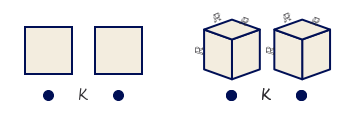

In [8]:
fig, axd = plt.subplot_mosaic([['2D', '3D']])

two_fiber_discrete(axd['2D'], textsize, labelsize)
three_fiber_discrete(axd['3D'], textsize, labelsize)
for ax in axd.values():
    k_discrete(ax, labelsize)
    ax.set(xlim=(-.15,1.15), ylim=(0,1), aspect='equal')
    ax.axis('off')    
fig.savefig(paper_path/"fiber.png", bbox_inches='tight' , facecolor='white')


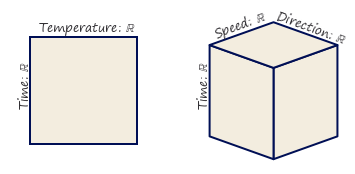

In [12]:
fig, axd = plt.subplot_mosaic([['2d', '3d']])
for ax in axd.values():
    ax.set(xlim=(0,1), ylim=(0,1), aspect='equal')
    ax.axis('off')
    
f1 = mpatches.Rectangle((.15, .15), .7, .7, facecolor=fc, edgecolor='C0', linewidth=2)
axd['2d'].add_patch(f1)

verts = np.array([[[1,-1], [1,1], [2.4, 1.5], [2.4, -.5]],
                 [[-.4,1.5],[-.4,-.5],[1,-1],[1,1]],
                 [[-.4, 1.5], [1, 2],[2.4, 1.5], [1,1]]])
verts1 = verts*.3 + [.25,.35]

p = mcollections.PolyCollection(verts1, edgecolor='C0', facecolor=fc, linewidth=2)
axd['3d'].add_collection(p)

textsize=12
axd['2d'].annotate(r"Time: $\mathbb{R}$", (.07,.4), rotation=90, fontsize=textsize)
axd['2d'].annotate(r"Temperature: $\mathbb{R}$", (.2, .89), fontsize=textsize)

axd['3d'].annotate(r"Time: $\mathbb{R}$", (.05,.4), rotation=90, fontsize=textsize)
axd['3d'].annotate(r"Speed: $\mathbb{R}$", (.14, .85), rotation=20, fontsize=textsize)
axd['3d'].annotate(r"Direction: $\mathbb{R}$", (.55, .81), rotation=-20, fontsize=textsize)
fig.savefig(paper_path/"fiber.png", bbox_inches='tight' , facecolor='white')
fig.savefig(proposal_path/"fiber.png", bbox_inches='tight', facecolor='white')

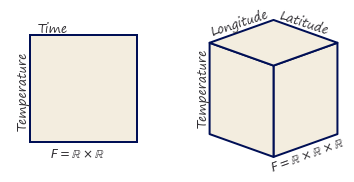

In [50]:
fig, axd = plt.subplot_mosaic([['2d', '3d']])
for ax in axd.values():
    ax.set(xlim=(0,1), ylim=(0,1), aspect='equal')
    ax.axis('off')
    
f1 = mpatches.Rectangle((.15, .15), .7, .7, facecolor=fc, edgecolor='C0', linewidth=2)
axd['2d'].add_patch(f1)

verts = np.array([[[1,-1], [1,1], [2.4, 1.5], [2.4, -.5]],
                 [[-.4,1.5],[-.4,-.5],[1,-1],[1,1]],
                 [[-.4, 1.5], [1, 2],[2.4, 1.5], [1,1]]])
verts1 = verts*.3 + [.25,.35]

p = mcollections.PolyCollection(verts1, edgecolor='C0', facecolor=fc, linewidth=2)
axd['3d'].add_collection(p)

textsize=12
axd['2d'].annotate(r"Temperature", (.06,.25), rotation=90, fontsize=textsize)
axd['2d'].annotate(r"Time", (.2, .87), fontsize=textsize)
axd['2d'].annotate(r"$F=\mathbb{R}\times\mathbb{R}$", (0.28,0.05), fontsize=textsize)

axd['3d'].annotate(r"Temperature", (.04,.27), rotation=90, fontsize=textsize)
axd['3d'].annotate(r"Longitude", (.12, .85), rotation=18, fontsize=textsize)
axd['3d'].annotate(r"Latitude", (.57, .86), rotation=-18, fontsize=textsize)
axd['3d'].annotate(r"$F=\mathbb{R}\times \mathbb{R}\times\mathbb{R}$", (0.52,.2), va='top', 
                   rotation=20, fontsize=textsize)
fig.savefig(slide_path/"fiber.png", bbox_inches='tight' , facecolor='white')
fig.savefig(proposal_path/"fiber.png", bbox_inches='tight', facecolor='white')

In [48]:
def two_fiber_continuous(ax, textsize, labelsize, ky=.25):
    for off in np.arange(-1,3.5,.25):
        verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 3.1]
        p = mpatches.PathPatch(mpath.Path(verts*.2, closed=True), edgecolor='C0',facecolor=ax.get_facecolor())
        ax.add_patch(p)
        
        
    #ax.annotate(r"$\mathbb{R}$", (-0.1, .63), rotation=90, fontsize=textsize) #height
    #ax.annotate(r"$\mathbb{R}$", (0.06,.88), rotation=25, fontsize=textsize) # width

    ax.annotate('K', (-.1, ky-.03), fontsize=labelsize)
    ax.axhline(y=ky, xmin=0.15, xmax=.9)



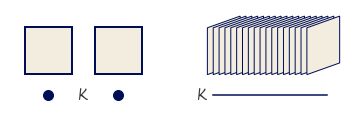

In [49]:
fig, axd = plt.subplot_mosaic([['0D', '1D']])

kpos = (3.75, -2.75)
two_fiber_discrete(axd['0D'], textsize, labelsize)
k_discrete(axd['0D'], labelsize)

two_fiber_continuous(axd['1D'], textsize, labelsize)
for (ax, kp) in zip(axd.values(),kpos) :
    ax.set(xlim=(-.15,1.15), ylim=(0,1), aspect='equal')
    ax.axis('off')    
    
fig.savefig(paper_path/"base.png", bbox_inches='tight', facecolor='white' )

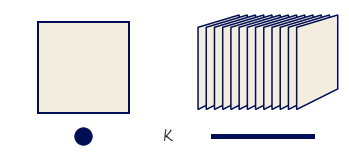

In [30]:
fig, axd = plt.subplot_mosaic([['0D', '1D']], gridspec_kw={'width_ratios':[1,1]})

axd['0D'].set(xlim=(0,1), ylim=(0,1), aspect='equal')
axd['1D'].set(xlim=(0,1), ylim=(0,1), aspect='equal')

f1 = mpatches.Rectangle((.2, .3), .6, .6, facecolor=fc, edgecolor='C0', linewidth=2)
axd['0D'].add_patch(f1)



for off in np.arange(0, 2.6,.2):
        verts = np.array([[1,-1], [1,1], [2, 1.3], [2, -.5], [1,-1]]) + [off-.8, 2.2]
        p = mpatches.PathPatch(mpath.Path(verts*.27, closed=True), 
                               edgecolor='C0', linewidth=1.5, facecolor=ax.get_facecolor())
        axd['1D'].add_patch(p)
        
        
    #ax.annotate(r"$\mathbb{R}$", (-0.1, .63), rotation=90, fontsize=textsize) #height
    #ax.annotate(r"$\mathbb{R}$", (0.06,.88), rotation=25, fontsize=textsize) # width

axd['0D'].scatter(.5, .15, s=300, color='C0')    
axd['1D'].axhline(y=.15, xmin=0.15, xmax=.8, linewidth=5)

[ax.axis('off') for ax in axd.values()]
fig.text(1.05, .15, 'K', ha='center', va='center', fontsize=labelsize, transform=axd['0D'].transData)
fig.savefig(slide_path/"base.png", bbox_inches='tight', facecolor='white' )
fig.savefig(paper_path/"base.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"base.png", bbox_inches='tight', facecolor='white')

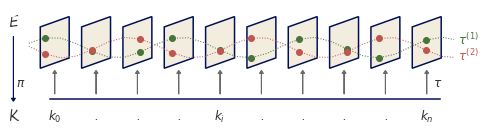

In [42]:
fig, ax = plt.subplots(figsize=(8,3))
x =  np.linspace(-5*np.pi, 7*np.pi)
xv = x[(x>0) & (x <30)]
ys = np.sin(xv)*.5
yc = np.cos(xv+1)*.5

pos_labs = {0:r"$k_0$", 4:r"$k_i$", 9:r"$k_n$"}

ct0 = '#49753B'
ct1 = '#BF5750'

for i, off in enumerate(np.arange(0,20,2)):
    verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True),
                           linewidth=1.5, edgecolor='C0',facecolor=ax.get_facecolor())
    ax.add_patch(p)
    ax.arrow(off+1.7, -2.25, 0, 1, head_width=0.2, head_length=0.15, color='dimgrey')

    ax.text(off+1.7, -3.3, pos_labs.get(i, '.'), fontsize=textsize, ha='center', va="center")
        
    

inds = [1, 4, 7, 9, 12, 14, 17, 20, 22, 25]
ax.scatter(xv[inds], ys[inds], color=ct0, label=r'$\tau^{(1)}$', zorder=10)
ax.scatter(xv[inds], yc[inds], color=ct1, label=r'$\tau^{(2)}$', zorder=10)
ax.plot(xv, ys, color=ct0, linewidth=1, linestyle=':')
ax.text(xv[-2], ys[-1], r'$\tau^{(1)}$', va='bottom', fontsize=12, color=ct0)
ax.plot(xv, yc, color=ct1, linewidth=1, linestyle=':')
ax.text(xv[-2], yc[-3], r'$\tau^{(2)}$', va='center', fontsize=12, color=ct1)

ax.annotate(r'E', (-.3, .8), fontsize=labelsize, ha='center', va='bottom')
ax.annotate(r'K', (-.3, -3.3), fontsize=labelsize, ha='center', va='center')
ax.arrow(-.3, .55, 0, -3, head_width=0.2, head_length=0.15, color='C0')
ax.annotate(r'$\pi$', (-.15, -1.85), fontsize=textsize)
ax.annotate(r'$\tau$', (20, -1.85), fontsize=textsize)
ax.axhline(y=-2.5, xmin=0.095, xmax=.97, zorder=-1)
#ax.legend(bbox_to_anchor=(1.0, .45), loc='lower left', borderaxespad=0, facecolor='white', frameon=False)
#ax.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=2)
ax.set(xlim=(-.6,21), ylim=(-3.5, 2), aspect='equal')
ax.axis('off')
fig.savefig(paper_path/"fiberbundle.png", bbox_inches='tight', facecolor='white' )
fig.savefig(slide_path/"fiberbundle.png", bbox_inches='tight', facecolor='white')
fig.savefig(proposal_path/"fiberbundle.png", bbox_inches='tight', facecolor='white')